In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

In [3]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [4]:
df['opposition'] = df['opposition'].str.replace('v ','')

In [5]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [6]:
type(df['date'][0])

str

In [7]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)

In [8]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df['date']

0     2004-12-23
1     2004-12-26
2     2004-12-27
3     2005-04-02
4     2005-04-05
         ...    
345   2019-06-27
346   2019-06-30
347   2019-07-02
348   2019-07-06
349   2019-07-09
Name: date, Length: 350, dtype: datetime64[ns]

In [10]:
df['year'] = df['date'].dt.year

In [11]:
df['year']

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32

In [12]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [13]:
type(df['score'])

pandas.core.series.Series

In [14]:
df['score']=df['score'].apply(str)

In [15]:
type(df['score'])

pandas.core.series.Series

In [16]:
df['not out'] = np.where(df['score'].str.endswith('*'),1,0)

In [17]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [18]:
df = df.drop('odi_number',axis=1)

In [19]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [39]:
df_new = df.loc[((df['score']!='DNB') & (df['score']!='TDNB')),'runs_scored':]

In [40]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [41]:
type(df['score'][0])

str

In [42]:
type(df['fours'][0])

str

In [43]:
df_new['runs_scored'] =  df_new['runs_scored'].astype(int)
df_new['balls_faced'] =  df_new['balls_faced'].astype(int)
df_new['strike_rate'] =  df_new['strike_rate'].astype(float)
df_new['fours'] =  df_new['fours'].astype(int)
df_new['sixes'] =  df_new['sixes'].astype(int)

In [44]:
type(df_new['fours'][0])

numpy.int32

In [45]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [53]:
grp_oppo = df_new.groupby('opposition')
grp_oppo

In [59]:
sum_of_runs_scored = grp_oppo['runs_scored'].sum()

In [60]:
sum_of_runs_scored

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32

In [61]:
type(runs_scored_by_oppo)

pandas.core.series.Series

In [62]:
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored)

In [63]:
type(runs_scored_by_opposition)

pandas.core.frame.DataFrame

In [64]:
runs_scored_by_opposition

,runs_scored
opposition,
Afghanistan,36
Africa XI,174
Australia,1660
Bangladesh,569
Bermuda,29
England,1546
Hong Kong,109
Ireland,34
Netherlands,19


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Africa XI'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Bangladesh'),
  Text(4, 0, 'Bermuda'),
  Text(5, 0, 'England'),
  Text(6, 0, 'Hong Kong'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'Pakistan'),
  Text(11, 0, 'South Africa'),
  Text(12, 0, 'Sri Lanka'),
  Text(13, 0, 'West Indies'),
  Text(14, 0, 'Zimbabwe')])

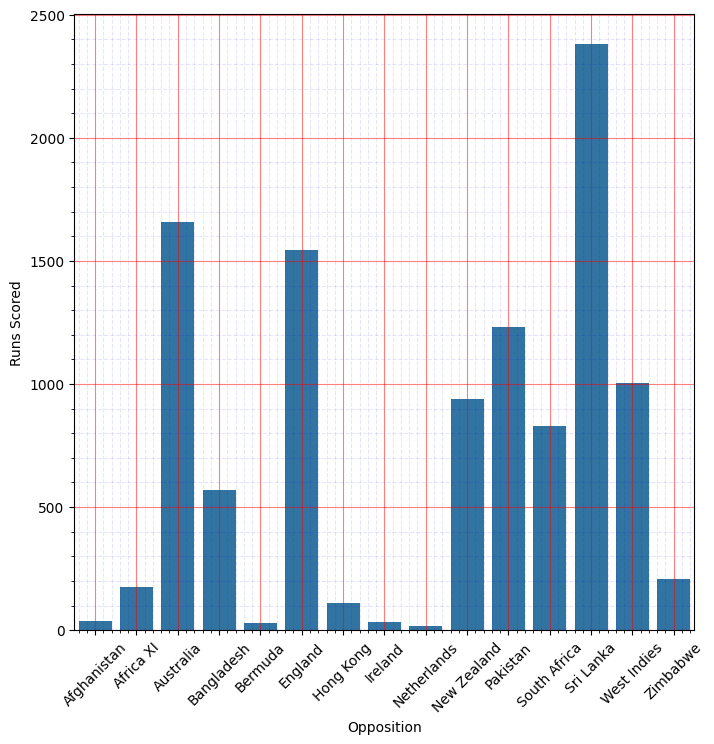

In [77]:
plt.figure(figsize=(8,8))
sns.barplot(x='opposition',y='runs_scored',data=runs_scored_by_opposition)
plt.xlabel('Opposition')
plt.ylabel('Runs Scored')

plt.minorticks_on()
plt.grid(which='major',color='red',linestyle='-',alpha=0.5)
plt.grid(which='minor',color='blue',linestyle='--',alpha=0.1)


plt.xticks(rotation=45)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200')])

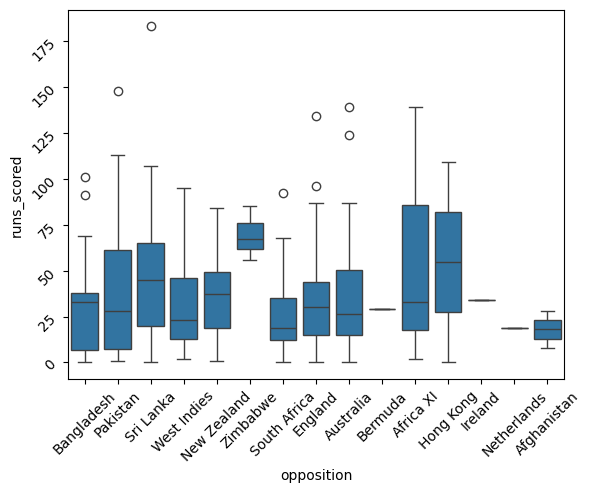

In [105]:
sns.boxplot(x='opposition',y='runs_scored',data=df_new)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [106]:
opposition_list = ['England','Australia','West Indies', 'South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']

In [107]:
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]

In [108]:
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
343,1,2,50.00,0,0,Pakistan,Manchester,2019-06-16,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [109]:
df_filtered['runs_scored'].sort_values()

0        0
273      0
66       0
68       0
74       0
      ... 
146    124
284    134
228    139
4      148
21     183
Name: runs_scored, Length: 284, dtype: int32

In [110]:
df_filtered = df_filtered.sort_values(by='runs_scored',ascending=False)

In [111]:
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...
74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0


<Axes: xlabel='runs_scored', ylabel='Count'>

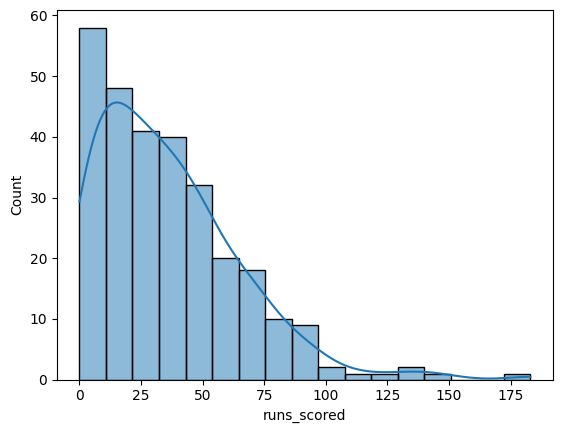

In [112]:
sns.histplot(x='runs_scored',data=df_filtered,kde=True)